In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from PIL import Image
import cv2

In [2]:
def magnitude(vector):
    return np.linalg.norm(vector)

In [3]:
def no_homo(vector):
    return vector[:3]

In [4]:
def vector(x,y,z,w):
    v = np.array([[x],[y],[z],[w]])
    return v

In [5]:
def graph(x0, y0, z0, v, col):
    ax.quiver(x0,y0,z0, v[0][0], v[1][0], v[2][0], arrow_length_ratio=0.05, color=col)
    plt.title("Demo")

In [6]:
def scale_matrix(Sx,Sy,Sz,w):
    mat = np.array([
        [Sx,0,0,0],
        [0,Sy,0,0],
        [0,0,Sz,0],
        [0,0,0,w]
    ])
    return mat

In [7]:
def spawn_sphere(radius):
  global ax
  # Make data
  r = radius
  u = np.linspace(0, 2 * np.pi, 100)
  v = np.linspace(0, np.pi, 100)
  x = r * np.outer(np.cos(u), np.sin(v))
  y = r * np.outer(np.sin(u), np.sin(v))
  z = r * np.outer(np.ones(np.size(u)), np.cos(v))

  # Plot the surface
  #'BuPu'
  ax.plot_surface(x, y, z, cmap='viridis')

  # Set an equal aspect ratio
  ax.set_aspect('equal')
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_zlabel("z")

In [8]:
def spawn_cylinder(radius):
  global ax
  psi = (7.68992248*radius)/12.5
  b = radius
  z_cylinder = np.linspace(0, psi, 100)
  theta_cylinder = np.linspace(0, 2 * np.pi, 100)
  z_cylinder_grid, theta_cylinder_grid = np.meshgrid(z_cylinder, theta_cylinder)

  # Parametrize the cylindrical surface
  x_cylinder = b * np.cos(theta_cylinder_grid)
  y_cylinder = b * np.sin(theta_cylinder_grid)
  # Plot the surface
  ax.plot_surface(x_cylinder, y_cylinder, z_cylinder_grid, alpha=0.8, cmap='plasma')

In [9]:
def spawn_frustum(radius):
  global ax
  r1 = radius
  r2 = (29*radius)/12.5
  h = (62*radius)/12.5
  psi = (7.68992248*radius)/12.5

  # Define z range for the frustum surface
  z = np.linspace(psi, psi + h, 100)

  # Calculate the radius at each z
  radii = r1 + (r2 - r1) / h * (z - psi)

  # Create the meshgrid for x and y based on the radius
  theta = np.linspace(0, 2 * np.pi, 100)
  z_grid, theta_grid = np.meshgrid(z, theta)

  # Parametrize the surface
  x = (r1 + (r2 - r1) / h * (z_grid - psi)) * np.cos(theta_grid)
  y = (r1 + (r2 - r1) / h * (z_grid - psi)) * np.sin(theta_grid)

  # Plot the surface
  ax.plot_surface(x, y, z_grid, alpha=0.8, cmap='viridis')

In [10]:
def spawn_vector_field(step_length, direction, scale_matrix, x0, y0, z0, domain):
    start = domain[0]
    end = domain[1]
    ray = np.matmul(scale_matrix, direction)
    for z0 in np.arange(start, end + step_length, step_length):
        for x0 in np.arange(start, end + step_length, step_length):
            graph(x0, y0, z0, ray, 'red')

In [11]:
def draw_sphere_on_hit(Q, d, radius, step_length, domain):
    start = domain[0]
    end = domain[1]
    # Initialize the 2D grid
    count = 0
    grid_size = int((radius*2) / step_length) + 1  # Considering the range from -4 to 4
    canvas = [[" " for _ in range(grid_size)] for _ in range(grid_size)]
    img = Image.new( 'RGB', (255, 255), "black") # Create a new black image
    pixels = img.load()
    # Iterate over the x and y values
    for i, z in enumerate(np.arange(start, end + step_length, step_length)):
        for j, x in enumerate(np.arange(start, end + step_length, step_length)):
            # Set the ray origin Q (x, y, z) with varying x and y
            Q = np.array([[x], [start], [z], [1]])

            # Coefficients of the quadratic equation at^2 + bt + c = 0
            a = magnitude(no_homo(d))**2
            b = 2 * np.dot(no_homo(d).T, no_homo(Q))[0][0]
            c = magnitude(no_homo(Q))**2 - radius**2

            # Discriminant
            discriminant = b**2 - 4*a*c

            # Check if the ray intersects the sphere
            if discriminant >= 0:
                pixels[i,j] = (255, 255, 255)
                count = count + 1
            else:
                pixels[i,j] = (0, 0, 0)
    # Print the 2D array
    print(f"RPS = {grid_size}px")
    print(f"- Number of white pixels = {count}px")
    print(f"- Number of non-white pixels = {65025-count}px")
    return img


Traced Image :


IndexError: image index out of range

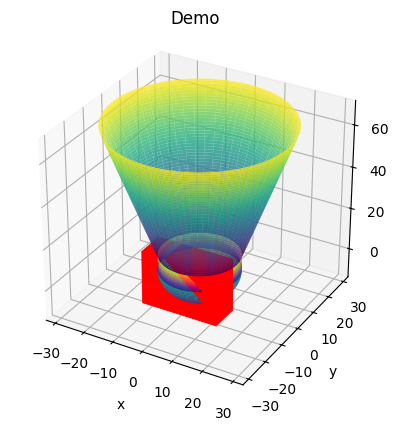

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

# h = float(input("Enter separation distance  : "))
# r = float(input("Enter radius length     : "))

w=1
r = 12.5

domain = [-r,r]
t=scale_matrix(10,10,10,w)
# P(t) = Q + td
d = vector(0,1,0,w)
Q = vector(-r,-r,-r,w)
spawn_sphere(r)
spawn_frustum(r)
spawn_cylinder(r)
spawn_vector_field(0.5, d, t, -r, -r, -r, domain)
# print("Reference Image :")
# count_white_pixels("trimmed.png")
print("\nTraced Image :")
img = draw_sphere_on_hit(Q, d, r, 0.07, domain)
display(img)
ax.view_init(30, 30)
plt.show()
#0.02615430267
#2.2035